# The effect of the pandemic on Airbnb in Dublin city

Airbnb has been growing fast during the last years. However, during 2020 with the abrupt decrease of travelling and tourism (at least internationally) due to the covid 19 spread in the world, we should expect a significative drop in the business. 

The main objectives of this analysis is:

    1- Determine the drop of homes avaliability in August 2020 compared to same month in 2019
    
    2- Compare the changes in prices from the different types of airbnb places:
            * Full apartment / house
            * Single room
            * Flat
            * Double room
            * Cottage
Dublin renting prices have been increasing fast in the last 5 years due to the lack of homes avaliable to rent. 

    3-The last objective of this analysis is to understand the contribuition of airbnb to the rent crisis in Dublin.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tqdm.notebook import tqdm
# print (plt.style.available)
%matplotlib inline

In [2]:
plt.style.use('seaborn-paper')

1- Data Understanding

In [6]:
# Data 2019
cal_2019 = pd.read_csv('/mnt/c/Users/Cafalchio/Documents/Audacity/Dublin_august_airbnb/2019/calendar.csv', parse_dates=True)
list_2019 = pd.read_csv('/mnt/c/Users/Cafalchio/Documents/Audacity/Dublin_august_airbnb/2019/listings.csv')
# Data 2020
cal_2020 = pd.read_csv('/mnt/c/Users/Cafalchio/Documents/Audacity/Dublin_august_airbnb/2020/calendar.csv')
list_2020 = pd.read_csv('/mnt/c/Users/Cafalchio/Documents/Audacity/Dublin_august_airbnb/2020/listings.csv', parse_dates=True)

In [7]:
cal_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3597075 entries, 0 to 3597074
Data columns (total 7 columns):
listing_id        int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights    int64
maximum_nights    int64
dtypes: int64(3), object(4)
memory usage: 192.1+ MB


In [5]:
list_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9855 entries, 0 to 9854
Data columns (total 16 columns):
id                                9855 non-null int64
name                              9854 non-null object
host_id                           9855 non-null int64
host_name                         9854 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     9855 non-null object
latitude                          9855 non-null float64
longitude                         9855 non-null float64
room_type                         9855 non-null object
price                             9855 non-null int64
minimum_nights                    9855 non-null int64
number_of_reviews                 9855 non-null int64
last_review                       8340 non-null object
reviews_per_month                 8340 non-null float64
calculated_host_listings_count    9855 non-null int64
availability_365                  9855 non-null int64
dtypes: float64(4),

The data is composed by list and calendar files:

The list file has the features of the listing, including property features, location and host information.

The calendar file has repeated properties offered during the month.

In [10]:
print(f'The 2019 data was collected from {cal_2019.date.min()} to {cal_2019.date.max()}')
print(f'The 2020 data was collected from {cal_2020.date.min()} to {cal_2020.date.max()}')

The 2019 data was collected from 2019-08-29 to 2020-08-27
The 2020 data was collected from 2020-08-27 to 2021-08-27


In [11]:
print(f'The number of properties listed in August 2019 was {len(list_2019)}\nand in 2020 was {len(list_2020)}, which is a {100*(1- len(list_2020)/len(list_2019)):.2f}% less listing in 2020.' )

The number of properties listed in August 2019 was 9855
and in 2020 was 8233, which is a 16.46% less listing in 2020.


In [12]:
list_2020.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.28995,-6.25813,Private room,58,3,227,2020-03-06,1.97,3,138
1,85148,Habitación en Dublín Double room,466111,Don,NaN,South Dublin,53.30110,-6.31992,Private room,30,1,1,2019-05-11,0.06,1,300
2,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29178,-6.25618,Private room,56,3,182,2020-03-09,1.61,3,239


In [13]:
cal_2019.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1341827,2019-08-29,f,$58.00,$58.00,2,8
1,44077,2019-08-29,t,$55.00,$55.00,3,60
2,44077,2019-08-30,f,$55.00,$55.00,3,60


In [14]:
## It is possible to see that many homes were listed repadeadely, to compare prices, the duplicated values will be removed
df_2019 = cal_2019.drop_duplicates(subset='listing_id', keep="first").copy()
df_2020 = cal_2020.drop_duplicates(subset='listing_id', keep="first").copy()
df_2019.dropna(subset=['price'], inplace=True)
df_2020.dropna(subset=['price'], inplace=True)
df_2019.drop(['adjusted_price', 'minimum_nights' , 'maximum_nights'], inplace=True, axis=1)
df_2020.drop(['adjusted_price', 'minimum_nights' , 'maximum_nights'], inplace=True, axis=1)

In [15]:
## Get just the prices from 2019 and 2020
prices = df_2019.merge(df_2020, how='left', on='listing_id')
prices = prices.dropna()
def get_price(s):
    ''' Basic fucntion to get the price as float
    Input string
    Output Float
    '''
    s = s.split('$')[1:]
    return float(''.join(s[0].split(',')))

prices.price_x = prices.price_x.apply(get_price)
prices.price_y = prices.price_y.apply(get_price)

In [16]:
prices.head()

,listing_id,date_x,available_x,price_x,date_y,available_y,price_y
1,44077,2019-08-29,t,55.0,2020-08-28,f,60.0
2,261248,2019-08-29,f,36.0,2020-08-28,f,38.0
3,266654,2019-08-29,f,35.0,2020-08-28,f,31.0
4,266856,2019-08-29,f,36.0,2020-08-28,f,38.0
6,85148,2019-08-29,f,30.0,2020-08-28,f,30.0


Understand if properties prices changes during 2020

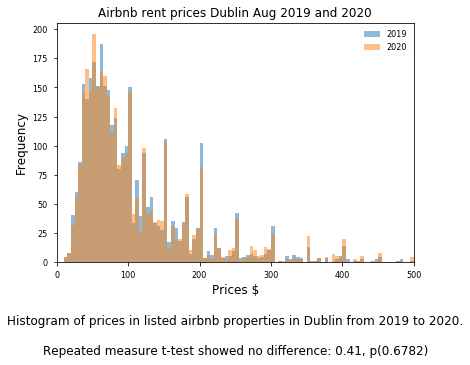

In [19]:
# Calculate repeated measures T-test in the prices 2019, 2010
t_test, p = stats.ttest_rel(prices.price_x.values ,prices.price_y.values )

#plot a sample of the data
sample_df = prices.sample(frac=0.5, replace=True, random_state=1)
plt.figure()
bins = np.arange(0, sample_df.price_x.max()+10, 5)
plt.hist(sample_df.price_x.values, bins, alpha=0.5, label='2019')
plt.hist(sample_df.price_y.values, bins, alpha=0.5, label='2020')
plt.legend(loc='upper right')
plt.xlabel('Prices $', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Airbnb rent prices Dublin Aug 2019 and 2020', fontsize=12)
txt = f'Histogram of prices in listed airbnb properties in Dublin from 2019 to 2020.\n\nRepeated measure t-test showed no difference: {t_test:.2f}, p({p:.4f})'
plt.text(250, -80, txt, ha='center',fontsize=12 )
plt.xlim((0, 500));
plt.show()

To repeat the same analysis to different type of properties, the different types need to be infered form the description

In [ ]:
list_2019.head(3)

**The objective is to get the different prices for:**

        * Full apartment/house
        * Single room
        * Flat
        * Double room


In [ ]:
#Lets first check the number of missing values in both listing datasets
list_2019.isna().sum()

In [ ]:
#Drop na from names
list_2019.dropna(subset=['name'], inplace=True)
list_2020.dropna(subset=['name'], inplace=True)

In [ ]:
#Create a new columns with the splitted words from name
list_2019['name_list'] = list_2019.name.apply(lambda x: x.split())
list_2020['name_list'] = list_2020.name.apply(lambda x: x.split())

In [ ]:
def get_sub_df(df, home_type):
    '''Function that return ids of properties that have the word in the name'''
    idx = []
    for i, names in enumerate(df.name_list):
        try:
            if home_type in names:
                idx.append(i)
        except:
            continue
    if len(idx) == 0:
        print(f'Was not possible to get idx for {home_type}')
        return 
    return df.iloc[idx]

In [ ]:
#Get Ids for different types of properties 2019
flat_2019 = get_sub_df(list_2019, 'Flat')
single_2019 = get_sub_df(list_2019, 'Single')
double_2019 = get_sub_df(list_2019, 'Double')
full_2019 = get_sub_df(list_2019, 'Full')

#Get Ids for different types of properties 2020
flat_2020 = get_sub_df(list_2020, 'Flat')
single_2020 = get_sub_df(list_2020,'Single')
double_2020 = get_sub_df(list_2020, 'Double')
full_2020 = get_sub_df(list_2020, 'Full')

In [ ]:
full_2020.head(3)

In [ ]:
#Check if there was change in one of the categories:
df_list_2019 = [flat_2019, single_2019, double_2019, full_2019]
df_list_2020 = [flat_2020, single_2020, double_2020, full_2020]
names = ['flats', 'single rooms', 'double rooms', 'full house/apartment']

fig, ax = plt.subplots(2,2, figsize = (12,8))
axis = ax.flatten()
for i in range(0,4):
    plt.sca(axis[i])
    bins = np.arange(0, df_list_2019[i].price.max()+10, 5)
    plt.hist(df_list_2019[i].price.values, bins, alpha=0.5, label='2019')
    plt.hist(df_list_2020[i].price.values, bins, alpha=0.5, label='2020')
    plt.legend(loc='upper right')
    plt.xlabel('Prices $', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.title(f'Airbnb {names[i]} prices Dublin Aug 2019 and 2020', fontsize=10)
    plt.xlim((0, 400));
plt.tight_layout()    

In [ ]:
# Calculate repeated measures T-test in the prices 2019, 2010
t_tests = []
mark=0
for n_19, n_20 in zip(df_list_2019, df_list_2020):
    t, p = (stats.ttest_ind(n_19.price.values,n_20.price.values))
    if p <=0.05:
        t_tests.append((t,p))
if not mark:
    print('No difference was observed in t-test from 2019 and 2020 in none of the groups.')

**Lastly, to understand how Airbnb business could affect house marketing in Dublin, the full houses and apartments will be considered.**


In [ ]:
print(f'The amount of full homes listed in Dublin in 2019 was {len(full_2019)} and in 2020 was {len(full_2020)}. Based on \nwe \
this data we can conclude that airbnb has no effect in the Dublin renting crisis.')

## STAGE ONE – DETERMINE BUSINESS OBJECTIVES

The first stage of the CRISP-DM process is to understand what you want to accomplish from a business perspective. Your organisation may have competing objectives and constraints that must be properly balanced. The goal of this stage of the process is to uncover important factors that could influence the outcome of the project. Neglecting this step can mean that a great deal of effort is put into producing the right answers to the wrong questions.
What are the desired outputs of the project?

    Set objectives – This means describing your primary objective from a business perspective. There may also be other related questions that you would like to address. For example, your primary goal might be to keep current customers by predicting when they are prone to move to a competitor. Related business questions might be “Does the channel used affect whether customers stay or go?” or “Will lower ATM fees significantly reduce the number of high-value customers who leave?”
    Produce project plan – Here you’ll describe the plan for achieving the data mining and business goals. The plan should specify the steps to be performed during the rest of the project, including the initial selection of tools and techniques.
    Business success criteria – Here you’ll lay out the criteria that you’ll use to determine whether the project has been successful from the business point of view. These should ideally be specific and measurable, for example reduction of customer churn to a certain level, however sometimes it might be necessary to have more subjective criteria such as “give useful insights into the relationships.” If this is the case then it needs to be clear who it is that makes the subjective judgment.

### Assess the current situation

This involves more detailed fact-finding about all of the resources, constraints, assumptions and other factors that you’ll need to consider when determining your data analysis goal and project plan.

    Inventory of resources – List the resources available to the project including:
        Personnel (business experts, data experts, technical support, data mining experts)
        Data (fixed extracts, access to live, warehoused, or operational data)
        Computing resources (hardware platforms)
        Software (data mining tools, other relevant software)
    Requirements, assumptions and constraints – List all requirements of the project including the schedule of completion, the required comprehensibility and quality of results, and any data security concerns as well as any legal issues. Make sure that you are allowed to use the data. List the assumptions made by the project. These may be assumptions about the data that can be verified during data mining, but may also include non-verifiable assumptions about the business related to the project. It is particularly important to list the latter if they will affect the validity of the results. List the constraints on the project. These may be constraints on the availability of resources, but may also include technological constraints such as the size of data set that it is practical to use for modelling.
    Risks and contingencies – List the risks or events that might delay the project or cause it to fail. List the corresponding contingency plans – what action will you take if these risks or events take place?
    Terminology – Compile a glossary of terminology relevant to the project. This will generally have two components:
        A glossary of relevant business terminology, which forms part of the business understanding available to the project. Constructing this glossary is a useful “knowledge elicitation” and education exercise.
        A glossary of data mining terminology, illustrated with examples relevant to the business problem in question.
    Costs and benefits – Construct a cost-benefit analysis for the project which compares the costs of the project with the potential benefits to the business if it is successful. This comparison should be as specific as possible. For example, you should use financial measures in a commercial situation. 

### Determine data mining goals

A business goal states objectives in business terminology. A data mining goal states project objectives in technical terms. For example, the business goal might be “Increase catalogue sales to existing customers.” A data mining goal might be “Predict how many widgets a customer will buy, given their purchases over the past three years, demographic information (age, salary, city, etc.), and the price of the item.” 

    Business success criteria  – describe the intended outputs of the project that enable the achievement of the business objectives.
    Data mining success criteria – define the criteria for a successful outcome to the project in technical terms—for example, a certain level of predictive accuracy or a propensity-to-purchase profile with a given degree of “lift.” As with business success criteria, it may be necessary to describe these in subjective terms, in which case the person or persons making the subjective judgment should be identified. 

### Produce project plan

Describe the intended plan for achieving the data mining goals and thereby achieving the business goals. Your plan should specify the steps to be performed during the rest of the project, including the initial selection of tools and techniques. 

    Project plan – List the stages to be executed in the project, together with their duration, resources required, inputs, outputs, and dependencies. Where possible, try and make explicit the large-scale iterations in the data mining process, for example, repetitions of the modelling and evaluation phases. As part of the project plan, it is also important to analyze dependencies between time schedule and risks. Mark results of these analyses explicitly in the project plan, ideally with actions and recommendations if the risks are manifested. Decide at this point which evaluation strategy will be used in the evaluation phase. Your project plan will be a dynamic document. At the end of each phase you’ll review progress and achievements and update the project plan accordingly. Specific review points for these updates should be part of the project plan.
    Initial assessment of tools and techniques – At the end of the first phase you should undertake an initial assessment of tools and techniques. Here, for example, you select a data mining tool that supports various methods for different stages of the process. It is important to assess tools and techniques early in the process since the selection of tools and techniques may influence the entire project.

## STAGE TWO – DATA UNDERSTANDING

The second stage of the CRISP-DM process requires you to acquire the data listed in the project resources. This initial collection includes data loading, if this is necessary for data understanding. For example, if you use a specific tool for data understanding, it makes perfect sense to load your data into this tool. If you acquire multiple data sources then you need to consider how and when you’re going to integrate these.

    Initial data collection report – List the data sources acquired together with their locations, the methods used to acquire them and any problems encountered. Record problems you encountered and any resolutions achieved. This will help both with future replication of this project and with the execution of similar future projects.

### Describe data 

Examine the “gross” or “surface” properties of the acquired data and report on the results.

    Data description report – Describe the data that has been acquired including its format, its quantity (for example, the number of records and fields in each table), the identities of the fields and any other surface features which have been discovered. Evaluate whether the data acquired satisfies your requirements.

### Explore data

During this stage you’ll address data mining questions using querying, data visualization and reporting techniques. These may include:

    Distribution of key attributes (for example, the target attribute of a prediction task)
    Relationships between pairs or small numbers of attributes
    Results of simple aggregations
    Properties of significant sub-populations
    Simple statistical analyses

These analyses may directly address your data mining goals. They may also contribute to or refine the data description and quality reports, and feed into the transformation and other data preparation steps needed for further analysis. 

    Data exploration report – Describe results of your data exploration, including first findings or initial hypothesis and their impact on the remainder of the project. If appropriate you could include graphs and plots here to indicate data characteristics that suggest further examination of interesting data subsets.

### Verify data quality

Examine the quality of the data, addressing questions such as:

    Is the data complete (does it cover all the cases required)?
    Is it correct, or does it contain errors and, if there are errors, how common are they?
    Are there missing values in the data? If so, how are they represented, where do they occur, and how common are they?

### Data quality report

List the results of the data quality verification. If quality problems exist, suggest possible solutions. Solutions to data quality problems generally depend heavily on both data and business knowledge.
STAGE THREE – DATA PREPARATION
Select your data 

This is the stage of the project where you decide on the data that you’re going to use for analysis. The criteria you might use to make this decision include the relevance of the data to your data mining goals, the quality of the data, and also technical constraints such as limits on data volume or data types. Note that data selection covers selection of attributes (columns) as well as selection of records (rows) in a table.

    Rationale for inclusion/exclusion – List the data to be included/excluded and the reasons for these decisions.

### Clean your data

This task involves raise the data quality to the level required by the analysis techniques that you’ve selected. This may involve selecting clean subsets of the data, the insertion of suitable defaults, or more ambitious techniques such as the estimation of missing data by modelling.

    Data cleaning report – Describe what decisions and actions you took to address data quality problems. Consider any transformations of the data made for cleaning purposes and their possible impact on the analysis results.

### Construct required data

This task includes constructive data preparation operations such as the production of derived attributes or entire new records, or transformed values for existing attributes.

    Derived attributes – These are new attributes that are constructed from one or more existing attributes in the same record, for example you might use the variables of length and width to calculate a new variable of area.
    Generated records – Here you describe the creation of any completely new records. For example you might need to create records for customers who made no purchase during the past year. There was no reason to have such records in the raw data, but for modelling purposes it might make sense to explicitly represent the fact that particular customers made zero purchases.

### Integrate data

These are methods whereby information is combined from multiple databases, tables or records to create new records or values.

    Merged data – Merging tables refers to joining together two or more tables that have different information about the same objects. For example a retail chain might have one table with information about each store’s general characteristics (e.g., floor space, type of mall), another table with summarised sales data (e.g., profit, percent change in sales from previous year), and another with information about the demographics of the surrounding area. Each of these tables contains one record for each store. These tables can be merged together into a new table with one record for each store, combining fields from the source tables.
    Aggregations – Aggregations refers to operations in which new values are computed by summarising information from multiple records and/or tables. For example, converting a table of customer purchases where there is one record for each purchase into a new table where there is one record for each customer, with fields such as number of purchases, average purchase amount, percent of orders charged to credit card, percent of items under promotion etc.

## STAGE FOUR – MODELLING
### Select modeling technique

As the first step in modelling, you’ll select the actual modelling technique that you’ll be using. Although you may have already selected a tool during the business understanding phase, at this stage you’ll be selecting the specific modelling technique e.g. decision-tree building with C5.0, or neural network generation with back propagation. If multiple techniques are applied, perform this task separately for each technique.

    Modelling technique – Document the actual modelling technique that is to be used.
    Modelling assumptions – Many modelling techniques make specific assumptions about the data, for example that all attributes have uniform distributions, no missing values allowed, class attribute must be symbolic etc. Record any assumptions made.

### Generate test design

Before you actually build a model you need to generate a procedure or mechanism to test the model’s quality and validity. For example, in supervised data mining tasks such as classification, it is common to use error rates as quality measures for data mining models. Therefore, you typically separate the dataset into train and test sets, build the model on the train set, and estimate its quality on the separate test set.

    Test design – Describe the intended plan for training, testing, and evaluating the models. A primary component of the plan is determining how to divide the available dataset into training, test and validation datasets.

### Build model

Run the modelling tool on the prepared dataset to create one or more models.

    Parameter settings – With any modelling tool there are often a large number of parameters that can be adjusted. List the parameters and their chosen values, along with the rationale for the choice of parameter settings.
    Models – These are the actual models produced by the modelling tool, not a report on the models.
    Model descriptions – Describe the resulting models, report on the interpretation of the models and document any difficulties encountered with their meanings.

### Assess model

Interpret the models according to your domain knowledge, your data mining success criteria and your desired test design. Judge the success of the application of modelling and discovery techniques technically, then contact business analysts and domain experts later in order to discuss the data mining results in the business context. This task only considers models, whereas the evaluation phase also takes into account all other results that were produced in the course of the project.

At this stage you should rank the models and assess them according to the evaluation criteria. You should take the business objectives and business success criteria into account as far as you can here. In most data mining projects a single technique is applied more than once and data mining results are generated with several different techniques. 

    Model assessment – Summarise the results of this task, list the qualities of your generated models (e.g.in terms of accuracy) and rank their quality in relation to each other.
    Revised parameter settings – According to the model assessment, revise parameter settings and tune them for the next modelling run. Iterate model building and assessment until you strongly believe that you have found the best model(s). Document all such revisions and assessments.

## STAGE FIVE – EVALUATION
Evaluate your results

Previous evaluation steps dealt with factors such as the accuracy and generality of the model. During this step you’ll assesses the degree to which the model meets your business objectives and seek to determine if there is some business reason why this model is deficient. Another option is to test the model(s) on test applications in the real application, if time and budget constraints permit. The evaluation phase also involves assessing any other data mining results you’ve generated. Data mining results involve models that are necessarily related to the original business objectives and all other findings that are not necessarily related to the original business objectives, but might also unveil additional challenges, information, or hints for future directions.

    Assessment of data mining results – Summarise assessment results in terms of business success criteria, including a final statement regarding whether the project already meets the initial business objectives.
    Approved models – After assessing models with respect to business success criteria, the generated models that meet the selected criteria become the approved models.

### Review process

At this point, the resulting models appear to be satisfactory and to satisfy business needs. It is now appropriate for you to do a more thorough review of the data mining engagement in order to determine if there is any important factor or task that has somehow been overlooked. This review also covers quality assurance issues—for example: did we correctly build the model? Did we use only the attributes that we are allowed to use and that are available for future analyses?

    Review of process – Summarise the process review and highlight activities that have been missed and those that should be repeated.

### Determine next steps

Depending on the results of the assessment and the process review, you now decide how to proceed.Do you finish this project and move on to deployment, initiate further iterations, or set up new data mining projects? You should also take stock of your remaining resources and budget as this may influence your decisions.

    List of possible actions – List the potential further actions, along with the reasons for and against each option.
    Decision – Describe the decision as to how to proceed, along with the rationale.

In [ ]:
cal_2019.head()

In [ ]:
list_2020.head()

In [ ]:
fig = plt.figure()
ax = fig.add_axes([.125,.125,.775,.775])
bins = numpy.arange(0, cal_2019['maximum_nights'].max() + 2 ,2)
ax.hist(data=cal_2019, x='maximum_nights', bins=bins)
plt.xlim((0,370))
plt.ylim((0,260000))
plt.xlabel('Number of days homes were disponible');
plt.ylabel('Counts');

In [ ]:
# t, p = ttest_ind(a, b, equal_var=False)

In [ ]:
cal_2019.drop_duplicates(subset='listing_id', keep="first", inplace=True)
cal_2020.drop_duplicates(subset='listing_id', keep="first", inplace=True)
cal_2019.dropna(subset=['price'], inplace=True)
cal_2020.dropna(subset=['price'], inplace=True)
cal_2019.drop(['adjusted_price', 'minimum_nights' , 'maximum_nights'], inplace=True, axis=1)
cal_2020.drop(['adjusted_price', 'minimum_nights' , 'maximum_nights'], inplace=True, axis=1)
prices = cal_2019.merge(cal_2020, how='left', on='listing_id')
prices = prices.dropna()
def get_price(s):
    s = s.split('$')[1:]
    return float(''.join(s[0].split(',')))

In [ ]:
plt.figure()
plt.subplot(1,2,1)
bins = np.arange(0, prices.price_x.max()+10, 10)
plt.hist(data = prices, x='price_x', bins=bins);

In [ ]:
mean_2019 = prices.price_x.mean()
mean_2020 = prices.price_y.mean()

In [ ]:
print(f'Airbnb Dublin prices 2019/2020')
print(f'mean of prices 2019 ${prices.price_x.mean():.2f}\ std ${prices.price_x.std():.2f}')
print(f'mean of prices 2020 ${prices.price_y.mean():.2f}\ std ${prices.price_y.std():.2f}')
print(f'Median of prices 2019: ${prices.price_x.median():.2f}\ 2020: ${prices.price_x.median():.2f}')

In [ ]:
list_2019.head()

In [ ]:
cal_2019.head()